# Investigatin Mushroom Features to Classify Poisonous Vs Edibles Using: 
### 1- AdaBoost Methodology
### 2- Gradient Boosting and GridSearch

## The Data

<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Main Goal of Project

**THIS IS IMPORTANT, THIS IS NOT Just A TYPICAL PREDICTIVE MODEL!**

My general goal here is to see if I can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features that people should look out for when picking mushrooms.

In [98]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploratory Data Analysis

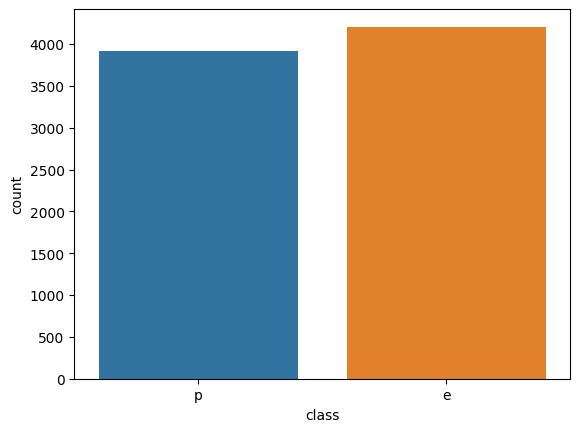

In [100]:
sns.countplot(data=df,x='class', hue='class');

In [15]:
# Transpose the dataframe and call .describe() off of it 
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [21]:
# Reset_index would add an index column with features as values 
df.describe().T.reset_index()

# Sort unique column so we can see which features have the most unique values
unique_feat = df.describe().T.reset_index().sort_values('unique')
unique_feat.head(10)

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


Now it is clear from above table that a feature like `veil-type` would not be helpful indicator of a mushroom being **poisonous** or **edible**. On the other hand, if we want to make a guidline for people to distinguish between edible and poisonous mushroom, a feature with several categories (such as `gill-color`) would also be not very useful since it would make the decision complicated.

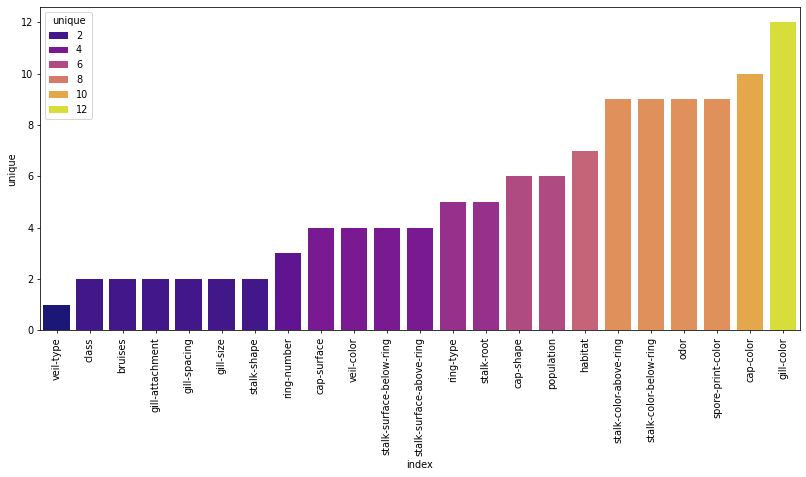

In [34]:
plt.figure(figsize=(14, 6), dpi=70)

sns.barplot(data=unique_feat, x='index', y='unique', hue='unique', palette='plasma')

plt.xticks(rotation=90);

# Train Test Split

In [35]:
# Check if we are dealing with any missing values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [36]:
# Separate X and y 
X = df.drop('class', axis=1)

# Convert categorical features to numerical features
X = pd.get_dummies(X,drop_first=True)

y = df['class']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Modeling and Evaluation

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Let's make a very simple Adaboost learner with only 1 number of estimator
model = AdaBoostClassifier(n_estimators=1)

# Fit the training data into the model
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

**Note:** The default base learner in sklearn library in Adaboost meta learner is a `single decision tree`. However, we can choose any desired machine learning models. Here, I am trying to build an Adabooster based on a single decision tree that has to perform only based on a **single feature!** 

In [41]:
predictions = model.predict(X_test)
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [42]:
print('The classification report: ')
print()
print(classification_report(y_test, predictions))

The classification report: 

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



So we can see that even with using a single feature of our dataset the **Adabooster learner** has performed pretty well!

In [43]:
# Check which feature the model has chosen to perform the classification task
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
# Check the index where the feature is located in array
model.feature_importances_.argmax()

22

In [45]:
# Check the name of the selected feature
X.columns[22]

'odor_n'

By refering to the dataframe attribute guidline we can see that `odor_n` is an indicator of whether a mushroom has an odor or is odorless. 

<Axes: xlabel='odor', ylabel='count'>

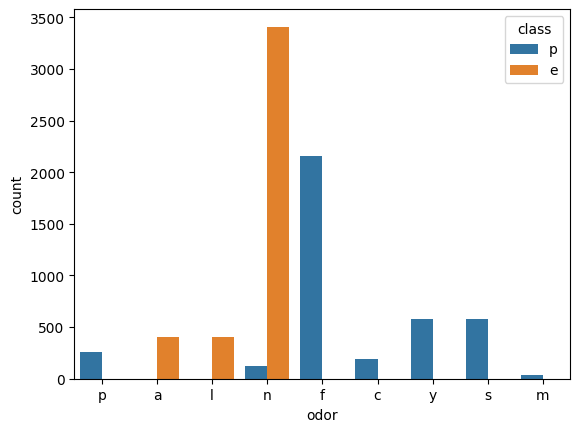

In [46]:
# Creat a count plot of odor
sns.countplot(data=df, x='odor', hue='class')

So the above graph and result shows that if we were to choose one indicator as a recommended guideline for people whether to choose a mushroom or not it would be the `odor feature`. So if a mushroom has any sort of odor it would be a high indicator of being **poisonous**.

## Analyzing Performance as More Weak Learners are Added.

Now let's see how changing the **number of estimators** in `Adabooster learners` will affect the error rates in those models.

In [52]:
len(X.columns)

95

In [60]:
# Define a for loop to build different Adaboosters with 1 to 96 number of estimators
error_rates = []

for n in range(1, 96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(err)

Text(0.5, 1.0, 'Error Rate vs. Number of Estimators in AdaBoost')

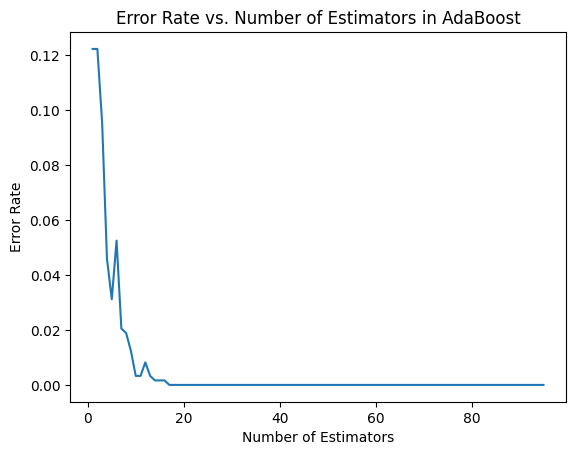

In [62]:
# Plot the error rates
plt.plot(range(1, 96), error_rates)

plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')

plt.title('Error Rate vs. Number of Estimators in AdaBoost')

So it is clear from the plot above that increasing the number of estimators after a specific number (here is approximatly 18) will not change (decrease) the error rate. We could have achived this result by performing a **grid search** as well, however, the elbow plot above basically has the same functionality.

In [80]:
# Define the final model with the number of estimators = 18
final_model = AdaBoostClassifier(n_estimators=18)

final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)

In [81]:
# Check the feature importances
final_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.05555556, 0.05555556,
       0.        , 0.        , 0.11111111, 0.05555556, 0.        ,
       0.        , 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [82]:
# Pass the feature importance (array) to a Pandas dataframe
feats = pd.DataFrame(index=X.columns, data=final_model.feature_importances_, columns=['Importance'])


In [87]:
feats

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [90]:
# Filter the important features
important_feats = feats[feats['Importance'] > 0]

# Sort the values in descending order
sorted_important_feat = important_feats.sort_values('Importance', ascending=False)
sorted_important_feat

,Importance
gill-size_n,0.166667
odor_n,0.111111
spore-print-color_w,0.111111
population_v,0.111111
bruises_t,0.055556
odor_c,0.055556
odor_f,0.055556
odor_p,0.055556
stalk-surface-above-ring_k,0.055556
stalk-surface-below-ring_y,0.055556


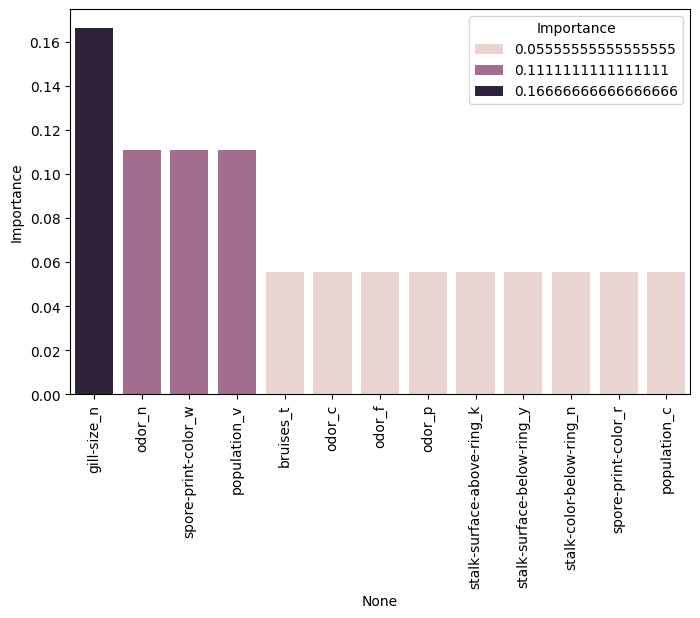

In [97]:
# Let's plot the result
plt.figure(figsize=(8, 5))
sns.barplot(data=sorted_important_feat, x=sorted_important_feat.index, y='Importance', hue='Importance')

plt.xticks(rotation=90);

Interesting to see how the importance of the features shift as more are allowed to be added in! But remember these are all weak learner stumps, and feature importance is available for all the tree methods!

## Gradient Boosting and Grid Search with CV

Now let's use the same train-test split of our data but this time build a `gradient boosting meta learner` combined with a grid search for some of its hyperparameters. Finally, I'll evaluate the model and compare it to the AdaBoost learner!

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_model = GradientBoostingClassifier()

param_grid = {'learning_rate': [0.1, 0.05, 0.2],
             'max_depth': [3, 4, 5],
             'n_estimators':[1,5, 10, 20, 40, 100]}

In [103]:
# Instanciate the grid search model with the defined gradient boosting based learner and the param_grid dict
grid_model = GridSearchCV(gb_model, param_grid=param_grid)

# Fit the model with the training data
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [105]:
# Check the best parameters the grid search has found
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [108]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

grid_pred = grid_model.predict(X_test)

print('The classification report: ')
print()
print(classification_report(y_test, grid_pred))

The classification report: 

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



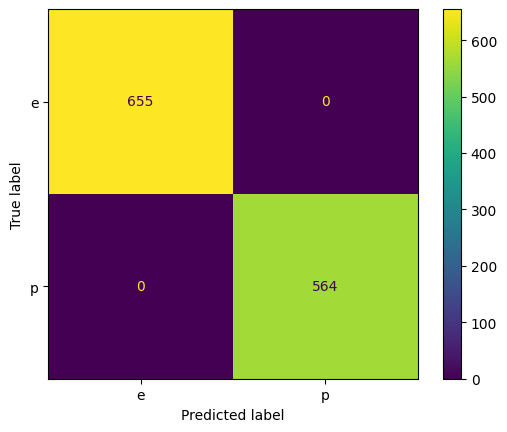

In [111]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, grid_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_model.classes_)
disp.plot()

It is pretty amazing that the gradient booster learner we trained on our data has performed with 100% accuracy and without any missclassification!

In [113]:
# Investigate the feature importances
feature_importance = grid_model.best_estimator_.feature_importances_
feature_importance

array([2.91150176e-04, 7.40004389e-17, 0.00000000e+00, 0.00000000e+00,
       7.67921676e-17, 1.04524302e-03, 0.00000000e+00, 5.06011038e-06,
       9.37350663e-18, 8.95530143e-19, 1.14606821e-17, 0.00000000e+00,
       2.74558572e-17, 0.00000000e+00, 0.00000000e+00, 2.22085608e-08,
       2.31055039e-03, 5.13086631e-02, 6.24175887e-04, 2.11822858e-02,
       1.82499853e-02, 3.92580649e-04, 6.14744334e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.04355233e-02, 0.00000000e+00, 1.67433726e-17, 0.00000000e+00,
       3.98299839e-17, 0.00000000e+00, 0.00000000e+00, 6.79869195e-17,
       5.08923943e-18, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.95769744e-04, 1.35972390e-01, 0.00000000e+00,
       3.04759120e-02, 4.83055163e-04, 2.54703069e-03, 6.53373439e-06,
       0.00000000e+00, 1.42943863e-03, 3.57398379e-02, 2.19219238e-03,
       0.00000000e+00, 0.00000000e+00, 7.93759017e-04, 0.00000000e+00,
      

**Note:** Many of the above values are almost zero! so we could set up a threshold and let's say, investigate those features that are greater than 0.005!

In [116]:
# Convert to a dataframe and filter the values
imp_feats = pd.DataFrame(index=X.columns, data=feature_importance, columns=['Importance'])
filtered_important_feat = imp_feats[imp_feats['Importance'] > 0.005]
filtered_important_feat

,Importance
bruises_t,0.051309
odor_f,0.021182
odor_l,0.018250
odor_n,0.614744
odor_p,0.008639
gill-spacing_w,0.012509
gill-size_n,0.010436
stalk-root_c,0.135972
stalk-root_r,0.030476
stalk-surface-below-ring_y,0.035740


In [137]:
# Sort the values of filtered_important_feat
sorted_important_feat = filtered_important_feat.sort_values('Importance')
sorted_important_feat

,Importance
odor_p,0.008639
gill-size_n,0.010436
gill-spacing_w,0.012509
odor_l,0.018250
odor_f,0.021182
stalk-root_r,0.030476
spore-print-color_r,0.030495
stalk-surface-below-ring_y,0.035740
bruises_t,0.051309
stalk-root_c,0.135972


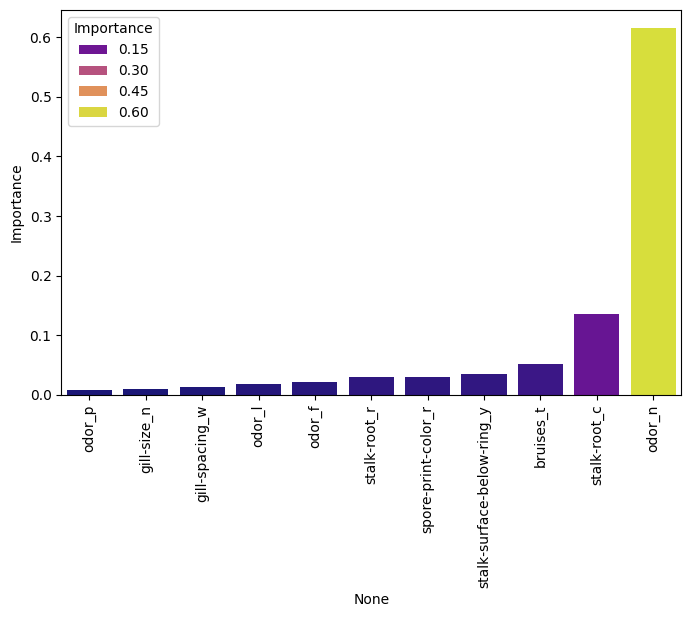

In [141]:
# Plot the feature importance
plt.figure(figsize=(8, 5))

sns.barplot(data=sorted_important_feat, x=sorted_important_feat.index, y='Importance', hue='Importance', palette='plasma')
plt.xticks(rotation=90);

<Axes: xlabel='stalk-root', ylabel='count'>

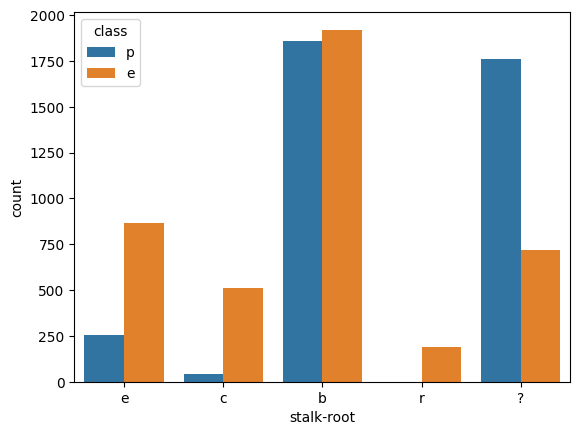

In [145]:
# Creat a count plot of stalk-root
sns.countplot(data=df, x='stalk-root', hue='class')


Finally, this model indicates that the most important features are `odor_n` and `stalk-root_c`! So now we are able to make a general guidline for people and tell them two or three main features of the mushrooms and they would be able to pick the edible ones with a very high accuracy! 

`Feature 1 => odor_n`: Indicates that mushrooms with no odors are very likely **edibles**.

`Feature 2 => stalk-root_c`: Indicates that mushrooms with club stalk-root are also very likely **edibles**.

We can go on and choose one or two more important features and based on these selected features make our guideline.